### Import paczek

In [20]:
include("utils/GlobalUsings.jl")
include("utils/DataLoader.jl")
include("Lib/CustomDiffLib.jl")
include("utils/NetFunctions.jl")
include("utils/Ploter.jl")

tripleMetricPlot (generic function with 1 method)

##  Załadowanie danych

In [2]:
X_train, y_train, X_test, y_test, classes  = getPrepearedData()
nothing

## SIEĆ FLUX

In [3]:
include("nets/netFlux.jl")
fluxNet, opt, loss, params = getDefaultFlux(4)
fluxLossHistory, fluxAccuracyTrainingHistory = trainFlux(fluxNet, params, X_train, y_train, 5, opt, loss)
fluxAccuracyTrainingVal = getTrainingAccValFromHistory(fluxAccuracyTrainingHistory)
fluxAccuracyTestHistory, fluxAccuracyTestVal = getFluxAccuracyValFromTest(fluxNet, X_test, y_test)
nothing

#### Wykresy 

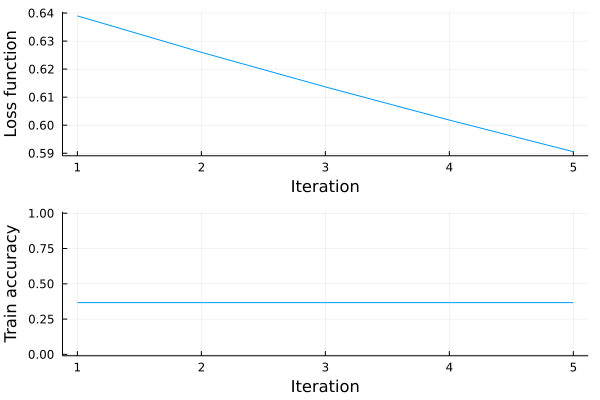

In [4]:
plotLossAccuracy(fluxLossHistory, fluxAccuracyTrainingHistory)

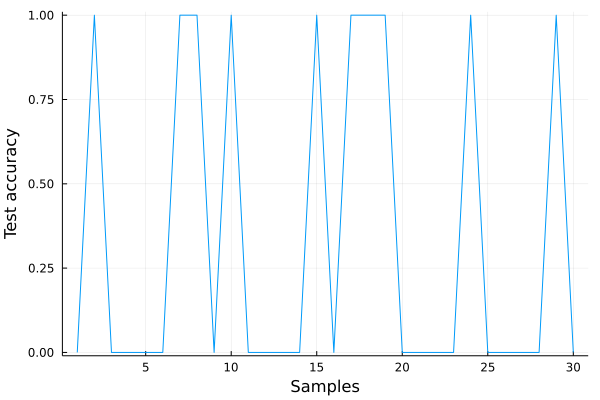

In [5]:
plotTestAccuracty(fluxAccuracyTestHistory)

### Sieć Ani

In [6]:
include("nets/NetAnia.jl")
aniaNet = getDefaultAniaNet(4)
aniaLossHistory, AniaAccHistory = trainAnia(aniaNet, X_train, y_train, 5, 0.01)
aniaAccTrainVal = getTrainingAccValFromHistory(AniaAccHistory)
aniaAccuracyTestHistory, AniaTestAccVal = accuracy(aniaNet, X_test, y_test)
nothing

### Wykresy

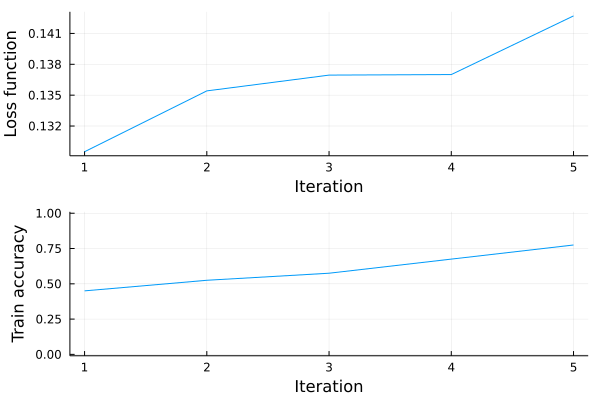

In [7]:
plotLossAccuracy(aniaLossHistory, AniaAccHistory)

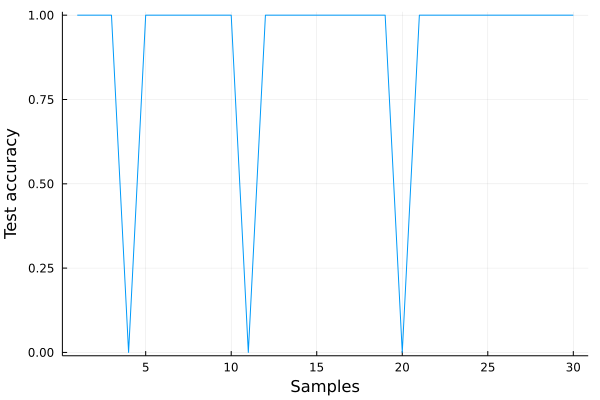

In [8]:
plotTestAccuracty(aniaAccuracyTestHistory)

## Sieć Sebastiana

In [9]:
include("nets/netSebastian.jl")
sebastianNet = getSebastianDefaultNet(4)
sebastianTrainLoss, sebastianTrainAccHistory = trainSebastian(sebastianNet, X_train, y_train, 5, 0.01)

sebastianTrainAccVal = getTrainingAccValFromHistory(sebastianTrainAccHistory)
sebastianTestAccuracy, sebastianTestAccVal = accuracySebastian(sebastianNet, X_test, y_test)
nothing


### Wykresy

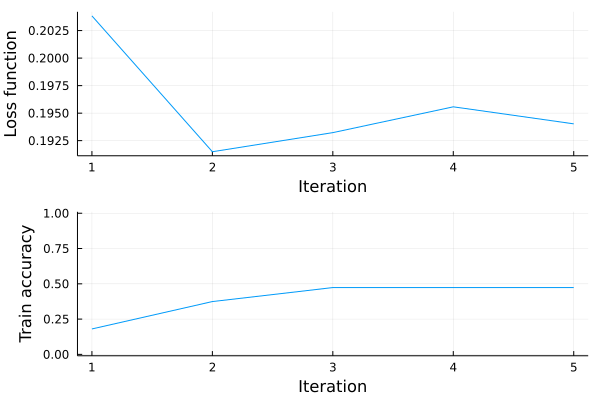

In [10]:
plotLossAccuracy(sebastianTrainLoss, sebastianTrainAccHistory)

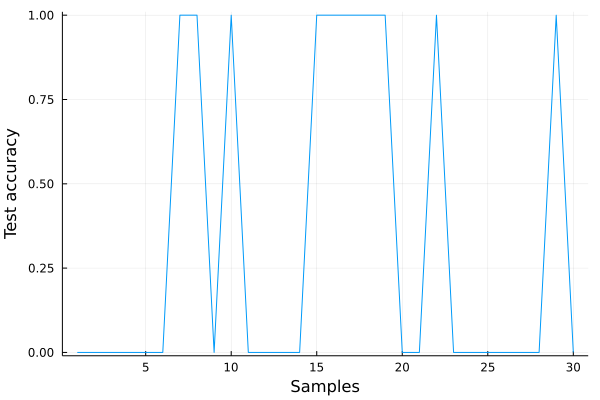

In [11]:
plotTestAccuracty(sebastianTestAccuracy)

In [12]:
df_learning_results = DataFrame(Net=String[], TestAccuracy=Float64[], TrainAccuracy=Float64[], LossFunctionMinimum=Float64[], LossFunctionMaximum=Float64[],LossFunctionStd=Float64[] )
push!(df_learning_results, ("Flux", fluxAccuracyTestVal, fluxAccuracyTrainingVal, minimum(fluxLossHistory), maximum(fluxLossHistory), std(fluxLossHistory)))
push!(df_learning_results, ("Ania", AniaTestAccVal, aniaAccTrainVal, minimum(aniaLossHistory), maximum(aniaLossHistory), std(aniaLossHistory)))
push!(df_learning_results, ("Sebastian", sebastianTestAccVal, sebastianTrainAccVal, minimum(sebastianTrainLoss), maximum(sebastianTrainLoss), std(sebastianTrainLoss)))
println("HIDDEN LAYERS:",3)
print(df_learning_results)

HIDDEN LAYERS:3
3×6 DataFrame
 Row │ Net        TestAccuracy  TrainAccuracy  LossFunctionMinimum  LossFunctionMaximum  LossFunctionStd 
     │ String     Float64       Float64        Float64              Float64              Float64         
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Flux           0.333333       0.366667             0.590541             0.638991       0.0191503
   2 │ Ania           0.9            0.6                  0.1295               0.142709       0.00471724
   3 │ Sebastian      0.333333       0.394928             0.191496             0.203831       0.00481354

### Benchmarki trenowania sieci z różną ilością warstw ukrytych

In [15]:
using BenchmarkTools
nHiddens_List = [6,8,16]
for hidden in nHiddens_List
    display(----------------------------------------------------------------------------------------------------------)
    display(-------------------------------HIDDEN LAYERS: $hidden)
    include("nets/netFlux.jl")
    fluxNet, opt, loss, params = getDefaultFlux(hidden)
    t1 = @benchmark trainFlux(fluxNet, params, X_train, y_train, 10, opt, loss)
    include("nets/netAnia.jl")
    aniaNet = getDefaultAniaNet(hidden)
    t2 = @benchmark trainAnia(aniaNet, X_train, y_train, 10, 0.01)
    include("nets/netSebastian.jl")
    sebastianNet = getSebastianDefaultNet(hidden)
    t3 = @benchmark trainSebastian(sebastianNet, X_train, y_train, 10, 0.010)
    display("FLUX  NETWORK")
    display(t1)
    display("Ania  NETWORK")
    display(t2)
    display("Sebastian  NETWORK")
    display(t3)
end
nothing

"----------------------------------------------------------------------------------------------------------"

"-------------------------------HIDDEN LAYERS: 6"

"FLUX  NETWORK"

BenchmarkTools.Trial: 5308 samples with 1 evaluation.
 Range (min … max):  558.400 μs … 33.205 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     715.500 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   932.724 μs ±  1.168 ms  ┊ GC (mean ± σ):  8.70% ± 8.24%

  ▄██▆▅▅▄▄▃▃▃▂▁▂▁▁                                             ▂
  ████████████████████▇█▇▇▇▇▅▇▅▆▆▅▅▅▅▅▅▅▁▁▄▃▁▁▃▁▁▁▄▃▁▄▁▁▁▃▁▁▁▄ █
  558 μs        Histogram: log(frequency) by time      3.94 ms <

 Memory estimate: 1.01 MiB, allocs estimate: 913.

"Ania  NETWORK"

BenchmarkTools.Trial: 7 samples with 1 evaluation.
 Range (min … max):  760.706 ms … 817.299 ms  ┊ GC (min … max): 2.20% … 4.06%
 Time  (median):     793.851 ms               ┊ GC (median):    4.18%
 Time  (mean ± σ):   789.358 ms ±  22.115 ms  ┊ GC (mean ± σ):  3.68% ± 1.06%

  █      █     █                     █           █  █         █  
  █▁▁▁▁▁▁█▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁█▁▁█▁▁▁▁▁▁▁▁▁█ ▁
  761 ms           Histogram: frequency by time          817 ms <

 Memory estimate: 209.73 MiB, allocs estimate: 2728888.

"Sebastian  NETWORK"

BenchmarkTools.Trial: 28 samples with 1 evaluation.
 Range (min … max):  174.343 ms … 188.560 ms  ┊ GC (min … max): 9.34% … 10.31%
 Time  (median):     178.843 ms               ┊ GC (median):    9.48%
 Time  (mean ± σ):   179.794 ms ±   4.590 ms  ┊ GC (mean ± σ):  9.30% ±  1.88%

  ▃ ▃ ██            ▃         ▃                               ▃  
  █▁█▁██▁▁▁▁▁▁▇▁▁▁▇▁█▁▇▁▁▁▇▇▁▁█▇▁▁▁▇▁▁▁▇▁▁▁▁▁▇▁▁▁▁▇▁▁▇▁▁▁▁▁▁▁▇█ ▁
  174 ms           Histogram: frequency by time          189 ms <

 Memory estimate: 112.91 MiB, allocs estimate: 1142607.

"----------------------------------------------------------------------------------------------------------"

"-------------------------------HIDDEN LAYERS: 8"

"FLUX  NETWORK"

BenchmarkTools.Trial: 5452 samples with 1 evaluation.
 Range (min … max):  594.000 μs …  25.731 ms  ┊ GC (min … max): 0.00% … 89.38%
 Time  (median):     711.150 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   909.823 μs ± 915.894 μs  ┊ GC (mean ± σ):  8.79% ±  8.79%

  ▄█▇▅▄▄▃▃▂▂▂▁▁                                                 ▁
  ████████████████████████▇▇█▇▆▇▅▇▅▅▅▆▃▄▁▃▄▅▃▃▃▃▁▁▁▁▁▄▆▁▁▁▁▁▁▁▃ █
  594 μs        Histogram: log(frequency) by time       3.73 ms <

 Memory estimate: 1.15 MiB, allocs estimate: 913.

"Ania  NETWORK"

BenchmarkTools.Trial: 5 samples with 1 evaluation.
 Range (min … max):  977.434 ms …   1.044 s  ┊ GC (min … max): 3.25% … 3.06%
 Time  (median):        1.004 s              ┊ GC (median):    3.19%
 Time  (mean ± σ):      1.002 s ± 27.367 ms  ┊ GC (mean ± σ):  3.85% ± 0.91%

  █                       ▁ ▁                                ▁  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  977 ms          Histogram: frequency by time          1.04 s <

 Memory estimate: 295.17 MiB, allocs estimate: 3556888.

"Sebastian  NETWORK"

BenchmarkTools.Trial: 19 samples with 1 evaluation.
 Range (min … max):  221.827 ms … 323.411 ms  ┊ GC (min … max): 7.94% … 11.60%
 Time  (median):     259.995 ms               ┊ GC (median):    7.18%
 Time  (mean ± σ):   264.914 ms ±  27.835 ms  ┊ GC (mean ± σ):  9.11% ±  3.07%

  ▁   ▁   ▁ ▁▁    ▁   ▁▁█▁█              ▁  ▁█       ▁        ▁  
  █▁▁▁█▁▁▁█▁██▁▁▁▁█▁▁▁█████▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁██▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁█ ▁
  222 ms           Histogram: frequency by time          323 ms <

 Memory estimate: 152.46 MiB, allocs estimate: 1495407.

"----------------------------------------------------------------------------------------------------------"

"-------------------------------HIDDEN LAYERS: 16"

"FLUX  NETWORK"

BenchmarkTools.Trial: 4053 samples with 1 evaluation.
 Range (min … max):  723.700 μs … 16.922 ms  ┊ GC (min … max): 0.00% … 81.43%
 Time  (median):     945.200 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):     1.223 ms ±  1.080 ms  ┊ GC (mean ± σ):  9.27% ± 10.13%

  ▆█▆▅▄▃▃▂▃▂▁▁                                                 ▁
  █████████████▇▇▇▇▅▅▆▃▃▅▁▃▄▁▃▃▄▁▁▁▁▁▁▁▃▁▃▁▁▁▁▁▁▁▁▁▃▃▄▃▅▄▄▅▃▅▃ █
  724 μs        Histogram: log(frequency) by time      8.13 ms <

 Memory estimate: 1.72 MiB, allocs estimate: 913.

"Ania  NETWORK"

BenchmarkTools.Trial: 3 samples with 1 evaluation.
 Range (min … max):  2.237 s …    2.632 s  ┊ GC (min … max): 4.41% … 4.35%
 Time  (median):     2.477 s               ┊ GC (median):    4.40%
 Time  (mean ± σ):   2.448 s ± 199.028 ms  ┊ GC (mean ± σ):  4.38% ± 0.03%

  █                                  █                     █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  2.24 s         Histogram: frequency by time         2.63 s <

 Memory estimate: 1.09 GiB, allocs estimate: 7026088.

"Sebastian  NETWORK"

BenchmarkTools.Trial: 9 samples with 1 evaluation.
 Range (min … max):  518.476 ms … 808.936 ms  ┊ GC (min … max): 10.95% … 9.86%
 Time  (median):     551.098 ms               ┊ GC (median):    11.61%
 Time  (mean ± σ):   582.858 ms ±  88.320 ms  ┊ GC (mean ± σ):  11.20% ± 0.78%

  ▁  ▁ █▁   ▁▁     ▁                                          ▁  
  █▁▁█▁██▁▁▁██▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  518 ms           Histogram: frequency by time          809 ms <

 Memory estimate: 701.06 MiB, allocs estimate: 3043407.

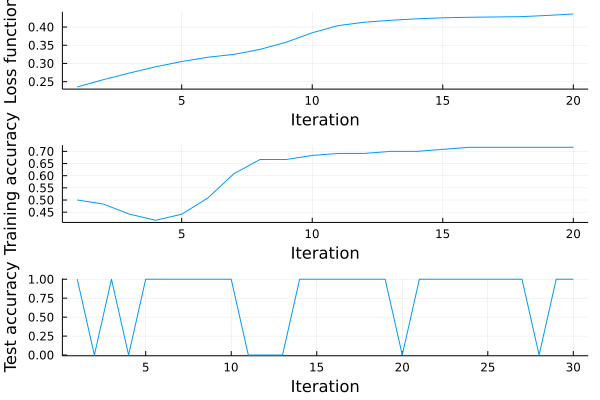

In [43]:
include("nets/netAnia.jl")
aniaLossHistory, AniaAccHistory, aniaAccTrainVal, aniaAccuracyTestHistory, AniaTestAccVal = getAniaResults(4, X_train, y_train, X_test, y_test, 20, 0.01)
tripleMetricPlot(aniaLossHistory, AniaAccHistory, aniaAccuracyTestHistory)

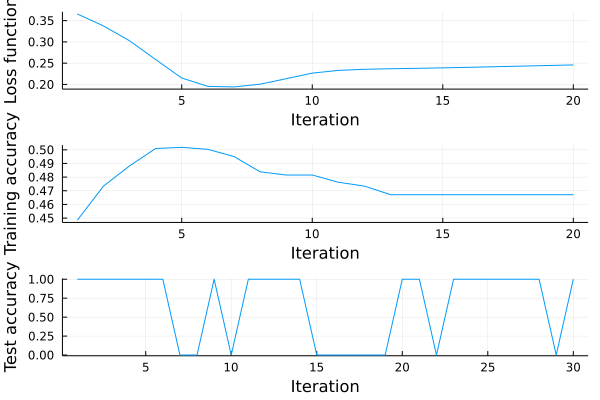

In [41]:
include("nets/netSebastian.jl")
sebastianTrainLoss, sebastianTrainAccHistory, sebastianTrainAccVal, sebastianTestAccuracy, sebastianTestAccVal = getSebastianResults(8, X_train, y_train, X_test, y_test, 20, 0.01) 
tripleMetricPlot(sebastianTrainLoss, sebastianTrainAccHistory, sebastianTestAccuracy)

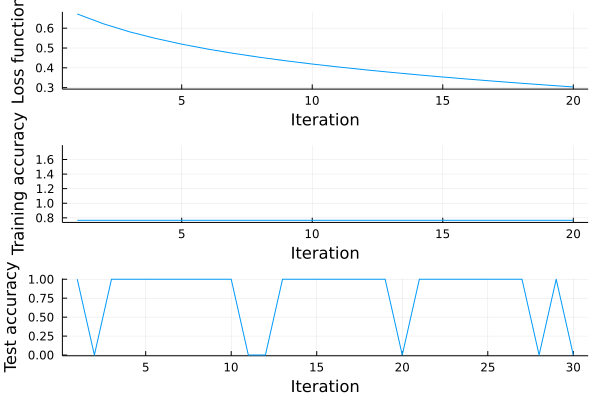

In [44]:
include("nets/netFlux.jl")
fluxLossHistory, fluxAccuracyTrainingHistory, fluxAccuracyTrainingVal, fluxAccuracyTestHistory, fluxAccuracyTestVal = getFluxResults(8, X_train, y_train, X_test, y_test, 20, 0.01) 
tripleMetricPlot(fluxLossHistory, fluxAccuracyTrainingHistory, fluxAccuracyTestHistory)